In [14]:
# %matplotlib inline
# %reload_ext autoreload

import sys
sys.path.append('../Class')
sys.path.append('../utils')

import numpy as np
import matplotlib.pyplot as plt
from loss import MSELoss
from lineaire import Linear
from mltools import gen_arti, plot_frontiere, plot_data
from transformations import TanH, Sigmoid

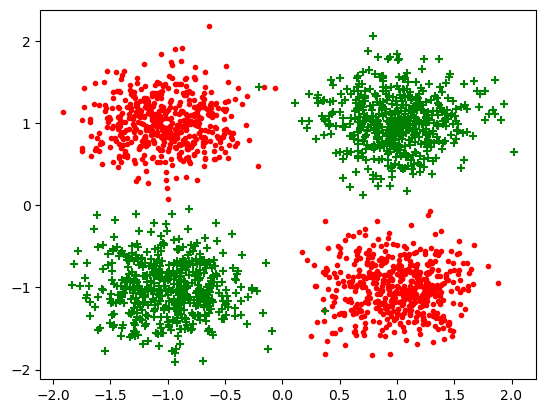

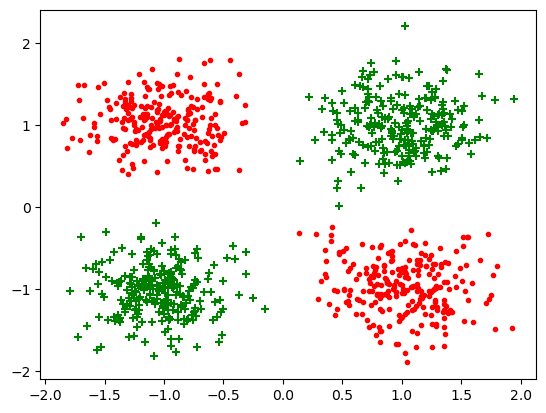

In [29]:
x_train, y_train = gen_arti(nbex=2000, data_type=1, epsilon=0.01)
y_train = np.where(y_train == -1, 0, 1).reshape(-1, 1)

x_test, y_test = gen_arti(nbex=1000, data_type=1, epsilon=0.01)
y_test = np.where(y_test == -1, 0, 1).reshape(-1, 1)

plot_data(x_train, y_train)
plt.show()

plot_data(x_test, y_test)
plt.show()

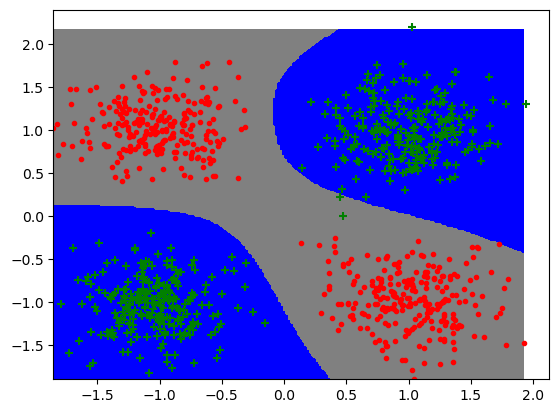

In [30]:
# implémentation en réalisant un réseau à deux couches linéaires avec une activation tangente entre les deux couches et une activation sigmoïde à la sortie.

hidden_size = 50
dim = 1
iter = 1000
input = x_train.shape[1]
# On crée le réseau
model1  = Linear(input, hidden_size)
model2 = Linear(hidden_size, dim)
 
loss = MSELoss()

# On crée les activations
tanh = TanH()
sigmoid = Sigmoid()

# On crée les paramètres
lr = 1e-3

for i in range(iter) : 
    # forward
    out_lin1 = model1.forward(x_train)
    out_tanh = tanh.forward(out_lin1)
    out_lin2 = model2.forward(out_tanh)
    out_sigmoid = sigmoid.forward(out_lin2)
    loss_val = loss.forward(out_sigmoid, y_train)

    # backward
    grad = loss.backward(y_train, out_sigmoid) # calcul du gradient de la loss 
    delta_sigmoid = sigmoid.backward_delta(out_lin2, grad) # calcul du delta de la sigmoide
    delta_lin2 = model2.backward_delta(out_tanh, delta_sigmoid) # calcul du delta de la couche linéaire
    delta_tanh = tanh.backward_delta(out_lin1, delta_lin2) # calcul du delta de la tangente
    delta_lin1 = model1.backward_delta(x_train, delta_tanh) # calcul du delta de la couche linéaire

    # update weights
    model1.backward_update_gradient(x_train, delta_tanh)
    model2.backward_update_gradient(out_tanh, delta_sigmoid)

    # update prameters
    model1.update_parameters(lr)
    model2.update_parameters(lr)

    # zero grad
    model1.zero_grad()
    model2.zero_grad()


# calcul prediction
def predict(x):
    out_lin1 = model1.forward(x)
    out_tanh = tanh.forward(out_lin1)
    out_lin2 = model2.forward(out_tanh)
    out_sigmoid = sigmoid.forward(out_lin2)
    return np.where(out_sigmoid >= 0.5, 1, 0)

plot_frontiere(x_test, predict, step=200)
plot_data(x_test, y_test.reshape(-1))

